# **Analysis of Petrol Consumption Data**



**Step 1** : Load the dataset and store it in a dataframe

In [ ]:
df<-read.csv(file="petrol_consumption.csv")
colnames(df)<-c("x1","x2","x3","x4","y")
head(df)

,x1,x2,x3,x4,y
,<dbl>,<int>,<int>,<dbl>,<int>
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410
6,10.0,5342,1333,0.571,457


**$y$:Response variable** 


**$x_1,x_2,x_3,x_4$**:explanatory variables

**Step 2** : Install necessary packages

In [ ]:
install.packages("olsrr")
install.packages("ggplot2")
install.packages("MASS")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘car’, ‘goftest’, ‘gridExtra’, ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Step 3**: Fit the multiple linear regression model with all the 4 covariates 

$E(y)=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3 x_3+\beta_4 x_4$

In [ ]:
library(olsrr)
model=lm(y~x1+x2+x3+x4,data=df)
summary(model)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers





Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-122.03  -45.57  -10.66   31.53  234.95 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.773e+02  1.855e+02   2.033 0.048207 *  
x1          -3.479e+01  1.297e+01  -2.682 0.010332 *  
x2          -6.659e-02  1.722e-02  -3.867 0.000368 ***
x3          -2.426e-03  3.389e-03  -0.716 0.477999    
x4           1.336e+03  1.923e+02   6.950 1.52e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.31 on 43 degrees of freedom
Multiple R-squared:  0.6787,	Adjusted R-squared:  0.6488 
F-statistic: 22.71 on 4 and 43 DF,  p-value: 3.907e-10


**Step 4** : Check the agreement between actual and fitted

In [ ]:
df[6]=model$fitted.values
colnames(df)<-c("x1","x2","x3","x4","y","fits")
head(df)

,x1,x2,x3,x4,y,fits
,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,9.0,3571,1976,0.525,541,523.2337
2,9.0,4092,1250,0.572,524,553.1153
3,9.0,3865,1586,0.580,561,578.1074
4,7.5,4870,2351,0.529,414,493.3563
5,8.0,4399,431,0.544,410,532.0289
6,10.0,5342,1333,0.571,457,433.5514


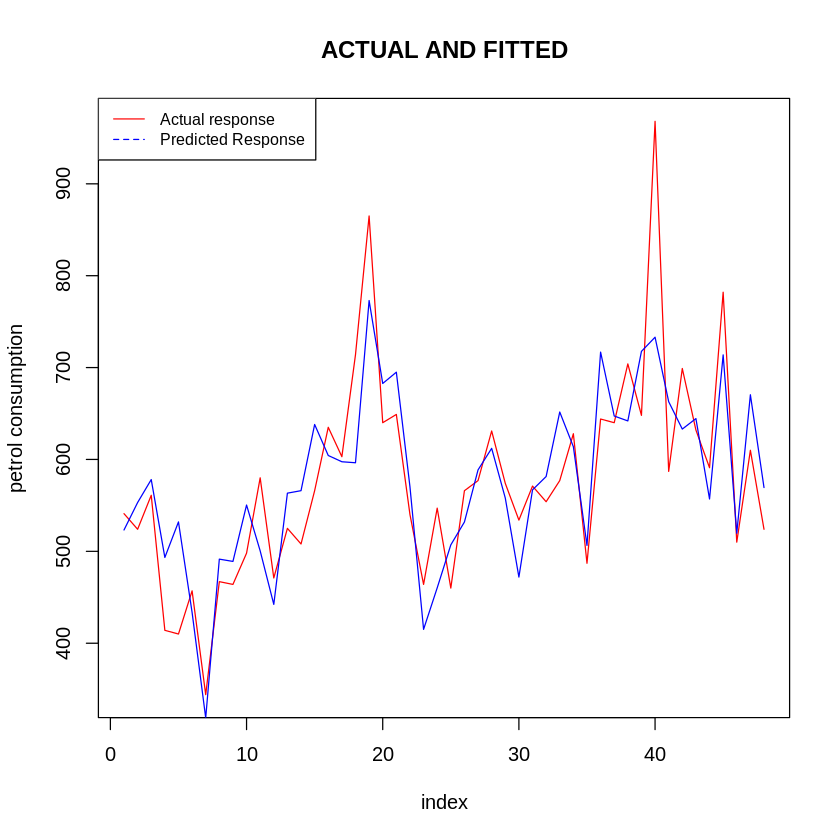

In [ ]:
plot(df$y,type="l",col="red",xlab="index",ylab="petrol consumption",main="ACTUAL AND FITTED")
lines(df$fits,type="l",col="blue")
legend("topleft",c("Actual response", "Predicted Response"),
       col=c("red", "blue"),lty=1:2, cex=0.8)

**Step 5** : Check residual plots

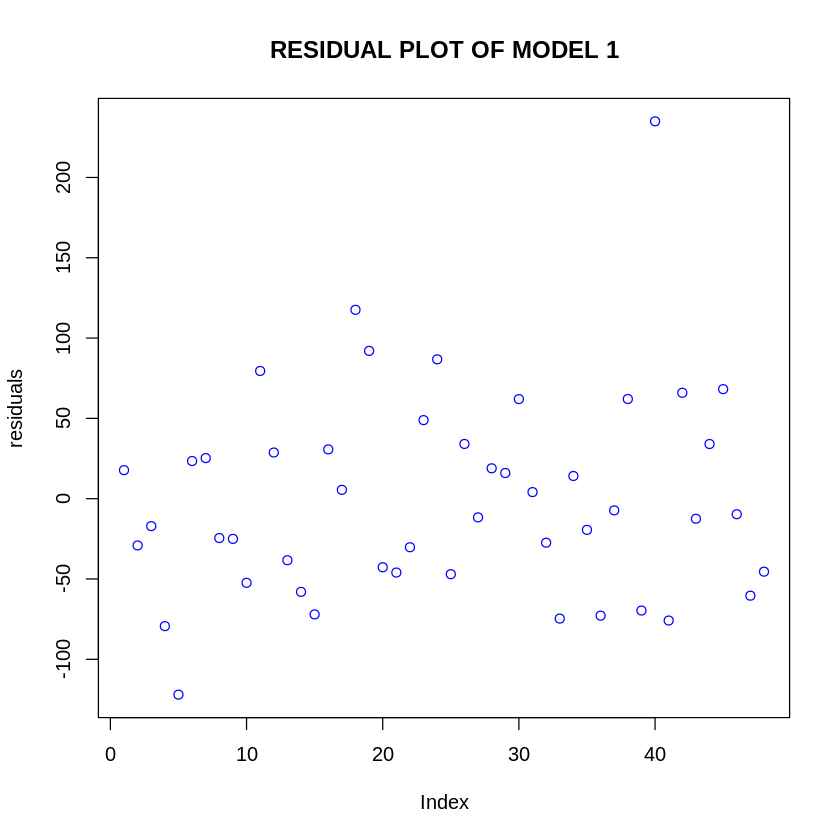

In [ ]:
plot(model$residuals,col="blue",main="RESIDUAL PLOT OF MODEL 1",ylab="residuals")

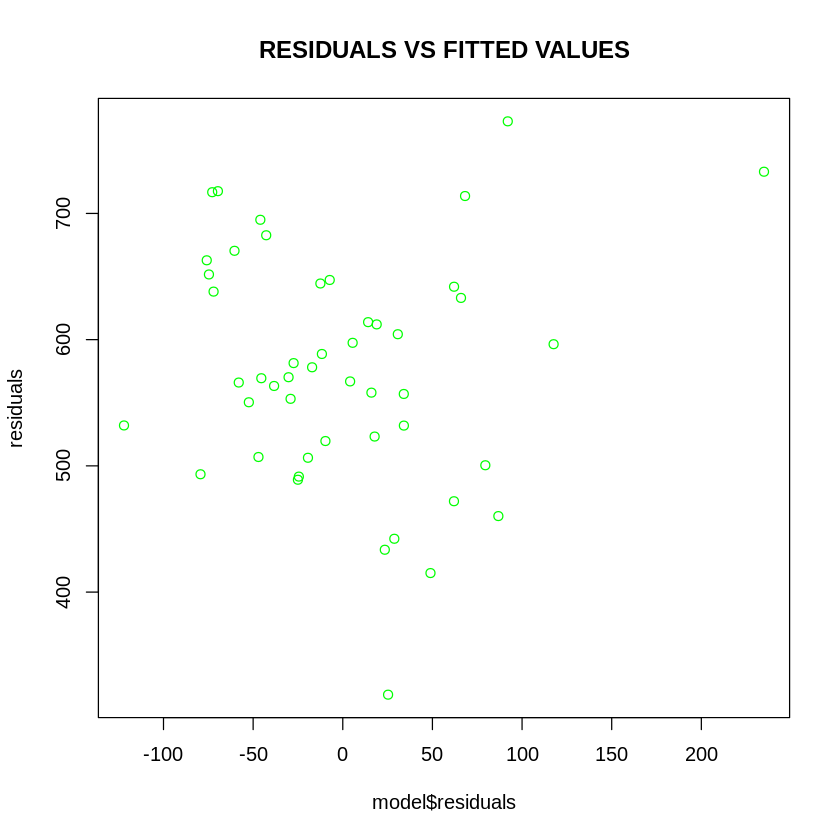

In [ ]:
plot(model$residuals,model$fitted.values,col="green",main="RESIDUALS VS FITTED VALUES",ylab="residuals")

**Step 6** : One sample runs test for randomness

In [ ]:
install.packages("randtests")
library(randtests)
runs.test(model$residuals)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Runs Test

data:  model$residuals
statistic = -0.2918, runs = 24, n1 = 24, n2 = 24, n = 48, p-value =
0.7704
alternative hypothesis: nonrandomness


**Step 7** : Breusch Pagan Test for heteroscedassticity

In [ ]:
ols_test_breusch_pagan(model,rhs=T)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

         Data          
 ----------------------
 Response : y 
 Variables: x1 x2 x3 x4 

         Test Summary          
 ------------------------------
 DF            =    4 
 Chi2          =    14.12654 
 Prob > Chi2   =    0.006901944 

**Step 8** : Normal QQ Plot and Shapiro Wilks Test

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’


Loading required package: ggplot2


Attaching package: ‘qqplotr’


The following objects are masked from ‘package:ggplot2’:

    stat_qq_line, StatQqLine




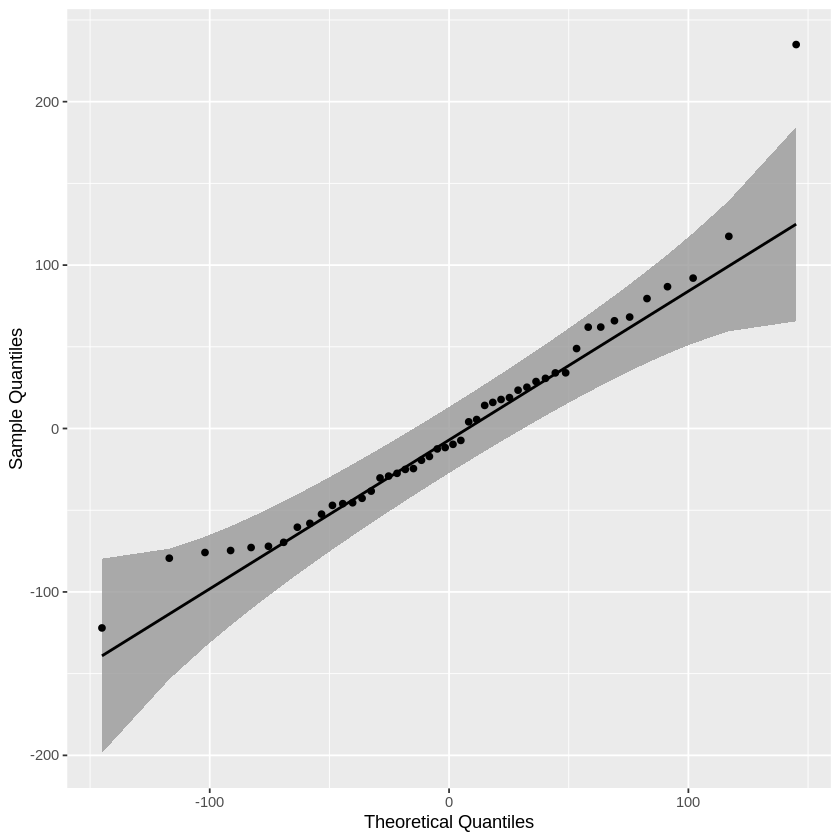

In [ ]:
install.packages("qqplotr")
library(qqplotr)
library(ggplot2)
require(qqplotr)
e <- data.frame(e = model$residuals)
gg <- ggplot(data = e, mapping = aes(sample = e)) +
  stat_qq_band() +
  stat_qq_line() +
  stat_qq_point() +
  labs(x = "Theoretical Quantiles", y = "Sample Quantiles")
gg

In [ ]:
shapiro.test(model$residuals)


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.93918, p-value = 0.0151


**Step 9:** Influential Diagnostics Plots

*Raw Residual box plot*

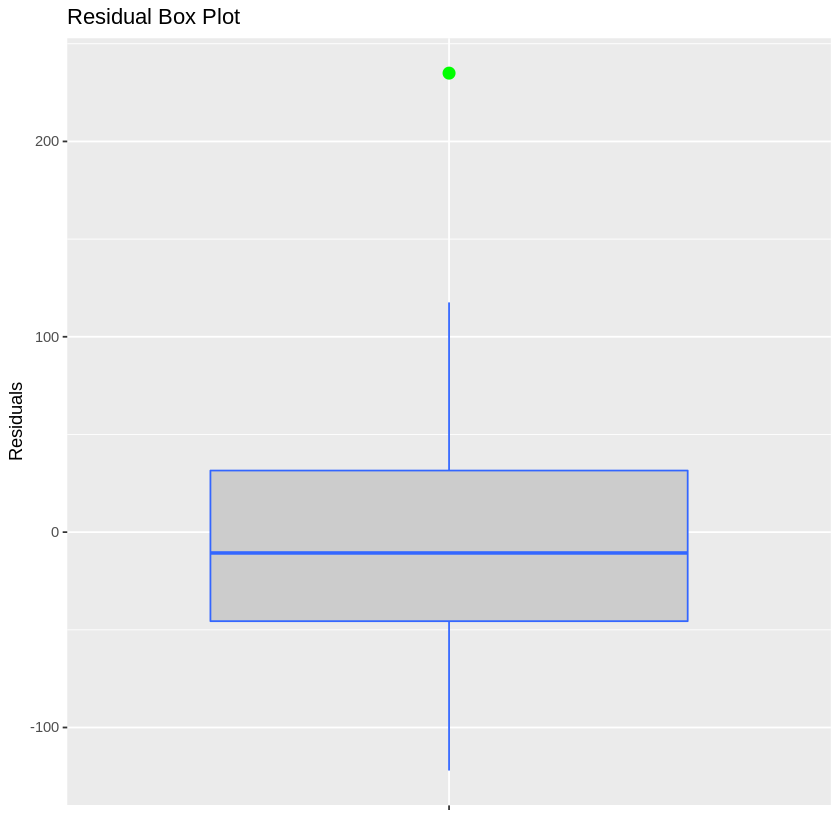

In [ ]:
ols_plot_resid_box(model)

*Internally studentized residulas* : $r_i$

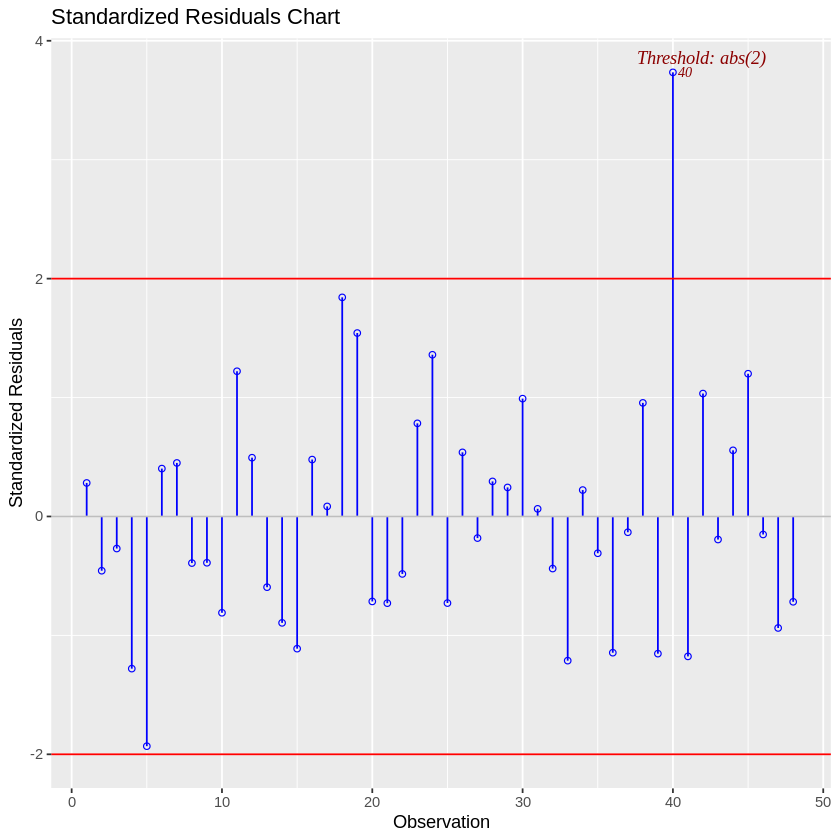

In [ ]:
ols_plot_resid_stand(model)

*Externally studentized residulas* : $t_i$

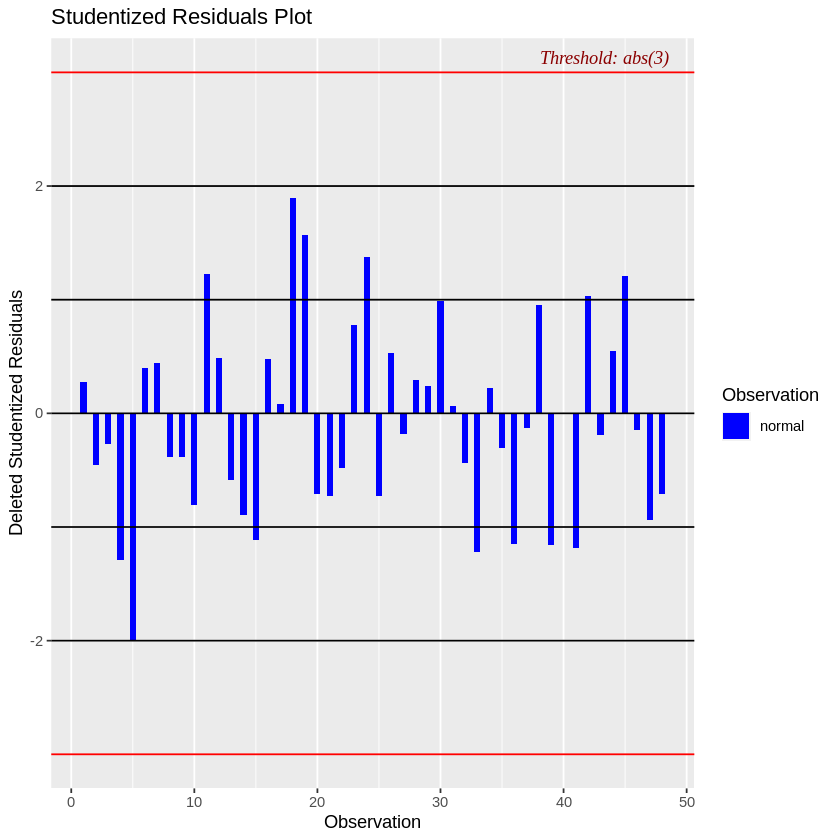

In [ ]:
ols_plot_resid_stud(model)

*Residual and leverage ($ h_i$) on same plot*

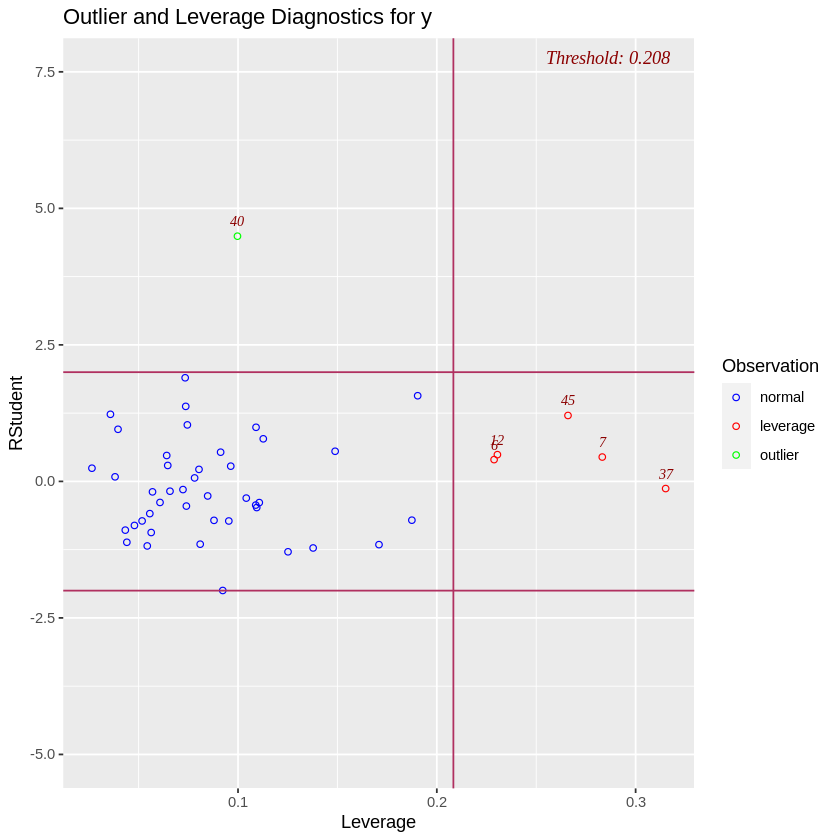

In [ ]:
ols_plot_resid_lev(model)

*Cook's Distance*

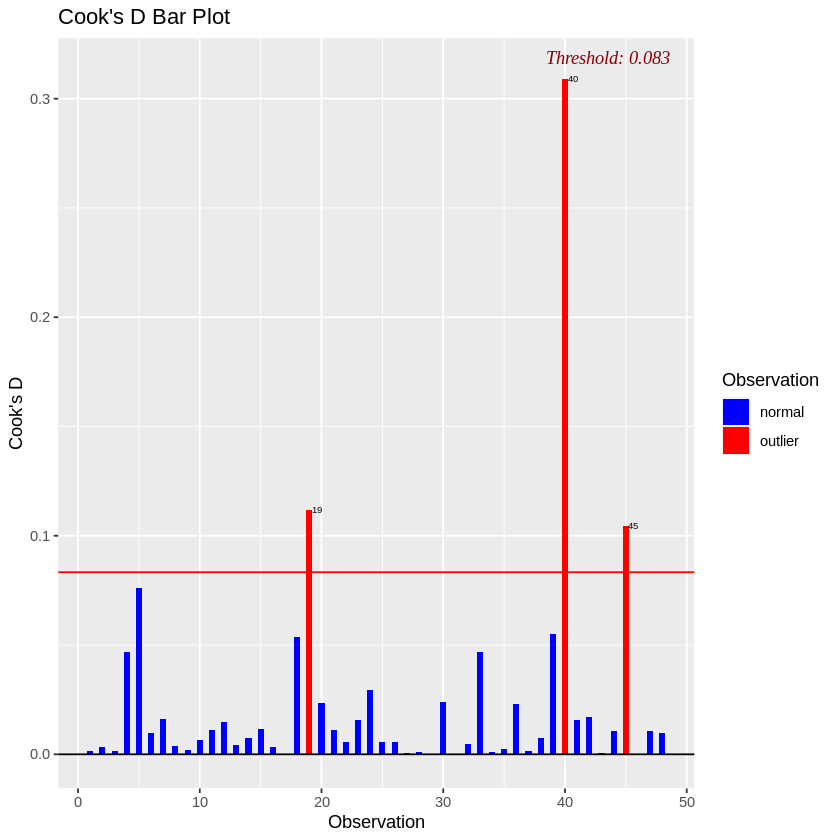

In [ ]:
ols_plot_cooksd_bar(model)

*DFFITS*

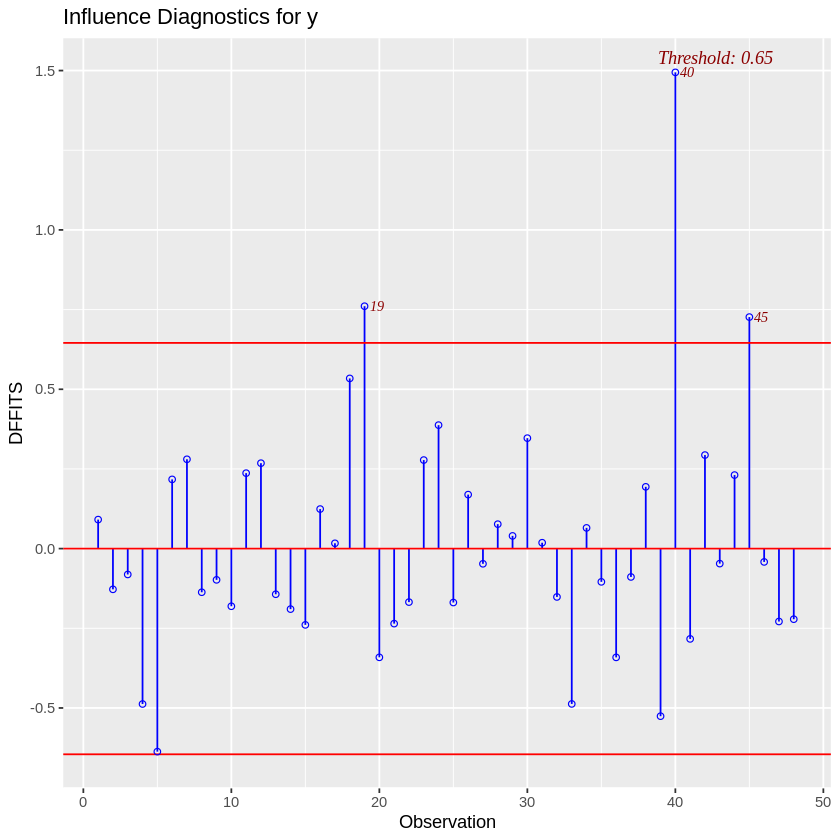

In [ ]:
ols_plot_dffits(model)

**Step 10** : Drop the points and again fit the same model with all 4 covariates

In [ ]:
df1=df[-c(19,40,45),]
model1=lm(y~x1+x2+x3+x4,data=df1)

**Step 11** : We removed the outliers to do the Box Cox transformation in order to achieve normality , so we do that




Attaching package: ‘MASS’


The following object is masked from ‘package:olsrr’:

    cement




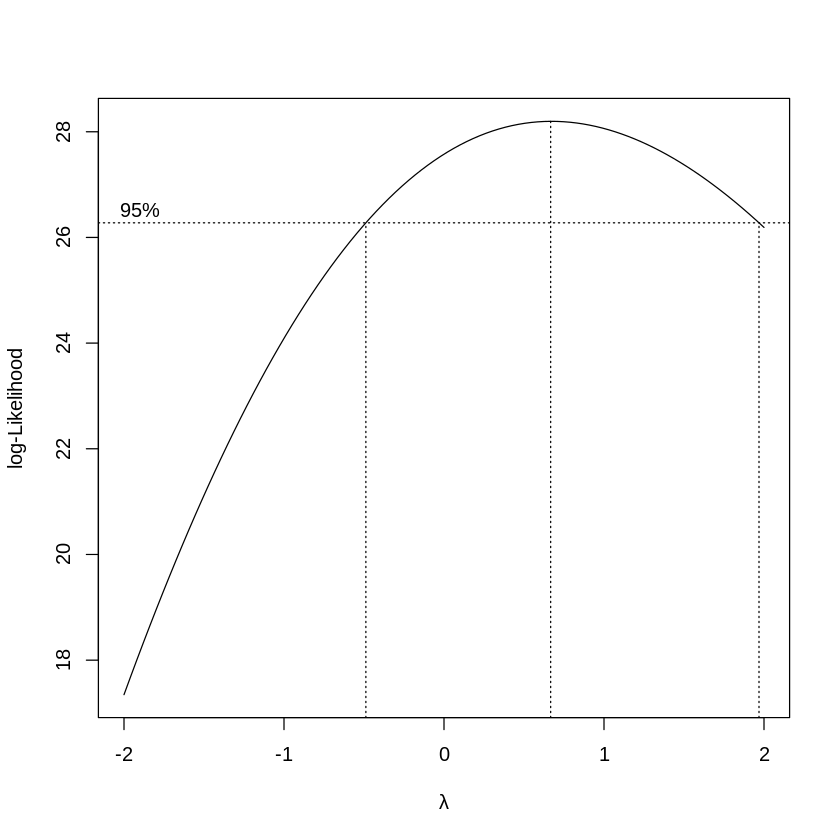

In [ ]:
library(MASS)
bc <- boxcox(model1)

In [ ]:
lambda <- bc$x[which.max(bc$y)]
y_new=((df1$y)^(lambda)-1)/lambda
df1[5]=y_new
head(df1)

,x1,x2,x3,x4,y,fits
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,9.0,3571,1976,0.525,98.09161,523.2337
2,9.0,4092,1250,0.572,95.99420,553.1153
3,9.0,3865,1586,0.580,100.53124,578.1074
4,7.5,4870,2351,0.529,81.82171,493.3563
5,8.0,4399,431,0.544,81.28414,532.0289
6,10.0,5342,1333,0.571,87.49564,433.5514


**Step 12** : Fit the same model ,just with transformed response

In [ ]:
model2=lm(y~x1+x2+x3+x4,data=df1)
summary(model2)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.248  -4.080  -0.295   2.640  14.454 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.702e+01  1.666e+01   5.824 8.36e-07 ***
x1          -2.463e+00  1.203e+00  -2.048   0.0472 *  
x2          -9.969e-03  1.548e-03  -6.440 1.14e-07 ***
x3           1.253e-04  3.103e-04   0.404   0.6884    
x4           1.122e+02  1.879e+01   5.970 5.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.679 on 40 degrees of freedom
Multiple R-squared:  0.7087,	Adjusted R-squared:  0.6795 
F-statistic: 24.33 on 4 and 40 DF,  p-value: 2.941e-10


**Step 13** : Now check for the normality assumption again - QQPLOT and shapiro wilks test

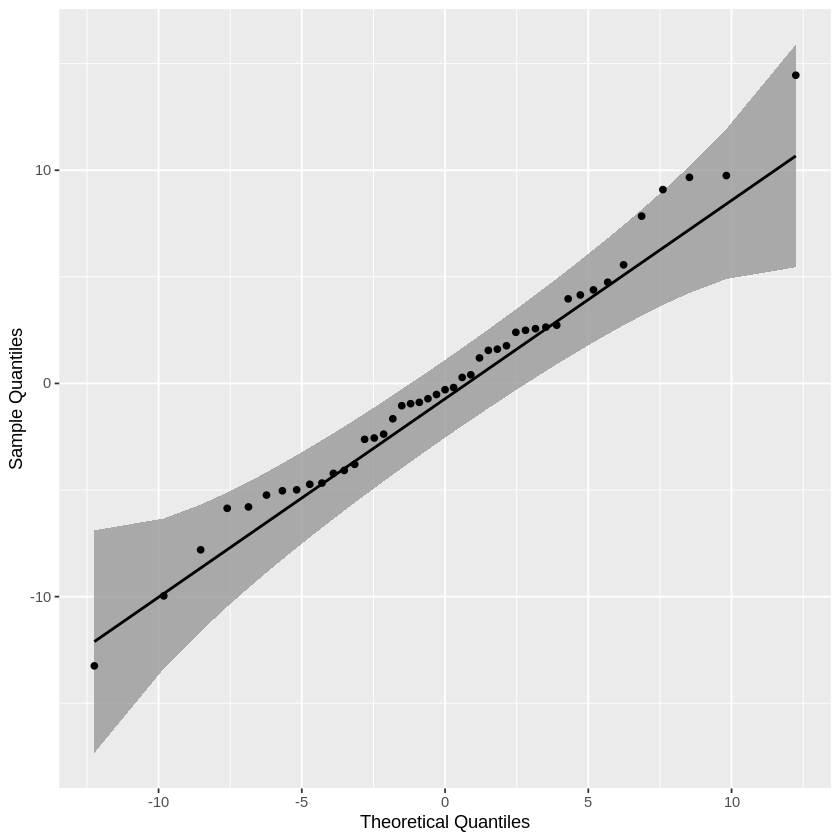

In [ ]:
e1 <- data.frame(e1 = model2$residuals)
gg1 <- ggplot(data = e1, mapping = aes(sample = e1)) +
  stat_qq_band() +
  stat_qq_line() +
  stat_qq_point() +
  labs(x = "Theoretical Quantiles", y = "Sample Quantiles")
gg1

In [ ]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.98472, p-value = 0.8091


**Step 14** : Normality satisfied, check homoscedasticity , no problem to use Bresuch Pagan now

In [ ]:
ols_test_breusch_pagan(model2)
ols_test_breusch_pagan(model2,rhs=T)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

            Data              
 -----------------------------
 Response : y 
 Variables: fitted values of y 

        Test Summary          
 -----------------------------
 DF            =    1 
 Chi2          =    0.03053727 
 Prob > Chi2   =    0.8612767 


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

         Data          
 ----------------------
 Response : y 
 Variables: x1 x2 x3 x4 

        Test Summary          
 -----------------------------
 DF            =    4 
 Chi2          =    8.219395 
 Prob > Chi2   =    0.08386413 

**Step 15** : homoscedasticity also satiefied,test for no autocorrelation

Loading required package: carData



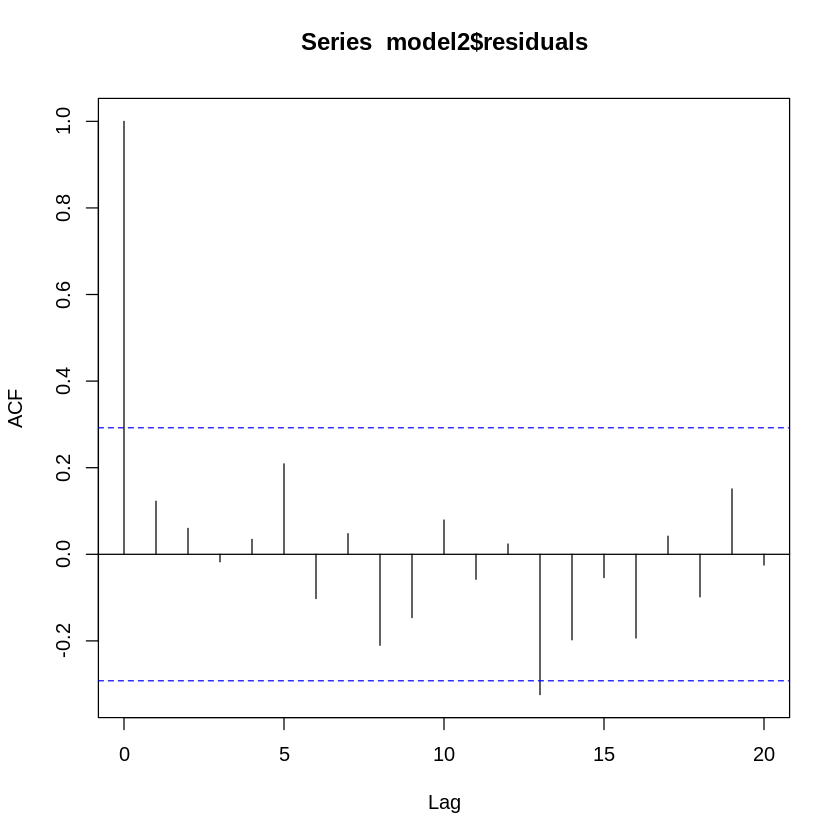

In [ ]:
library(car)
acf(model2$residuals, lag.max = 20,
    type = c("correlation", "covariance", "partial"),
    )

In [ ]:
durbinWatsonTest(model2)

 lag Autocorrelation D-W Statistic p-value
   1       0.1226579      1.752486   0.282
 Alternative hypothesis: rho != 0

**Step 16** : Check for presence of multicollinearity- Pairwise correlation and VIF

In [ ]:
cor(df1[-c(5,6)])

,x1,x2,x3,x4
x1,1.0000000,0.10399921,-0.59963864,-0.18032905
x2,0.1039992,1.00000000,0.09038648,0.03422025
x3,-0.5996386,0.09038648,1.00000000,-0.01362626
x4,-0.1803291,0.03422025,-0.01362626,1.00000000


In [ ]:
ols_coll_diag(model2)[1]

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
x1,0.5774498,1.731752
x2,0.9456295,1.057497
x3,0.5993434,1.668493
x4,0.9372729,1.066925


**Step 17** : Again take a look at the summary of this model which apparently seems to be fine

In [ ]:
summary(model2)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.248  -4.080  -0.295   2.640  14.454 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.702e+01  1.666e+01   5.824 8.36e-07 ***
x1          -2.463e+00  1.203e+00  -2.048   0.0472 *  
x2          -9.969e-03  1.548e-03  -6.440 1.14e-07 ***
x3           1.253e-04  3.103e-04   0.404   0.6884    
x4           1.122e+02  1.879e+01   5.970 5.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.679 on 40 degrees of freedom
Multiple R-squared:  0.7087,	Adjusted R-squared:  0.6795 
F-statistic: 24.33 on 4 and 40 DF,  p-value: 2.941e-10


**Step 18** : $x_3$ is insignificant, let us go for model selection - we use Forward selection

In [ ]:
ols_step_best_subset(model2)

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,x2,0.3215351,0.3057568,0.2538365,52.157023,322.7524,192.4457,328.1723,3143.953,72.96733,0.7415779,1.6633890
9,2,2,x2 x4,0.6436563,0.6266876,0.6007136,9.927980,295.7752,167.5762,303.0018,1691.543,40.07123,0.4072499,0.9162629
12,3,3,x1 x2 x4,0.7074906,0.6860875,0.6618349,3.163175,288.8922,162.1222,297.9256,1423.239,34.39725,0.3495844,0.7897327
15,4,4,x1 x2 x3 x4,0.7086790,0.6795469,0.6419588,5.000000,290.7090,164.2233,301.5490,1453.802,35.83055,0.3641512,0.8268588


[[1]]
NULL

[[2]]
NULL


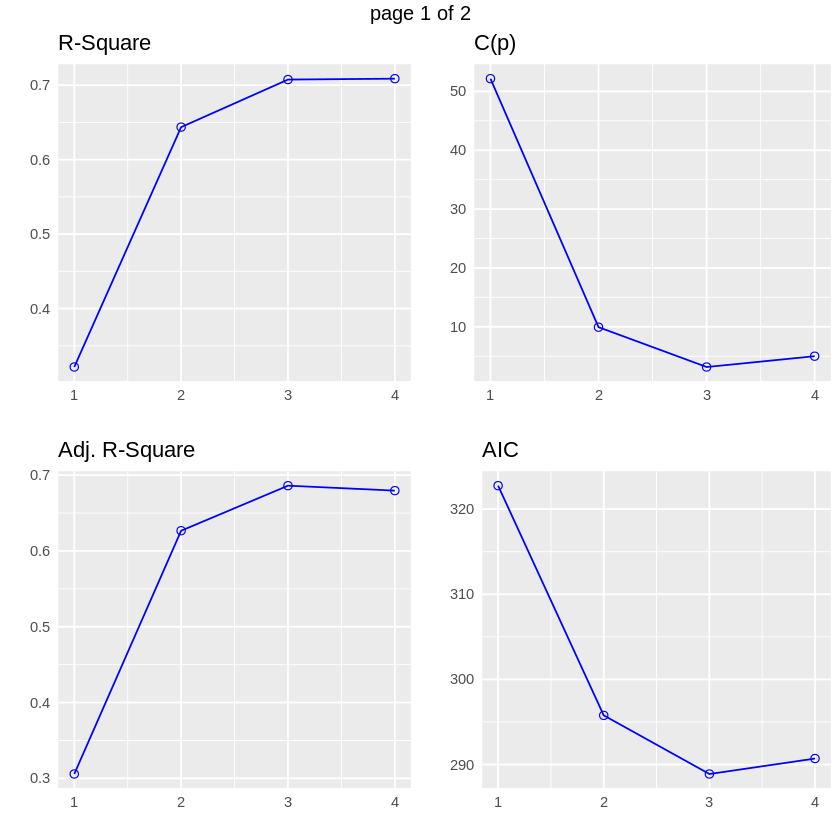

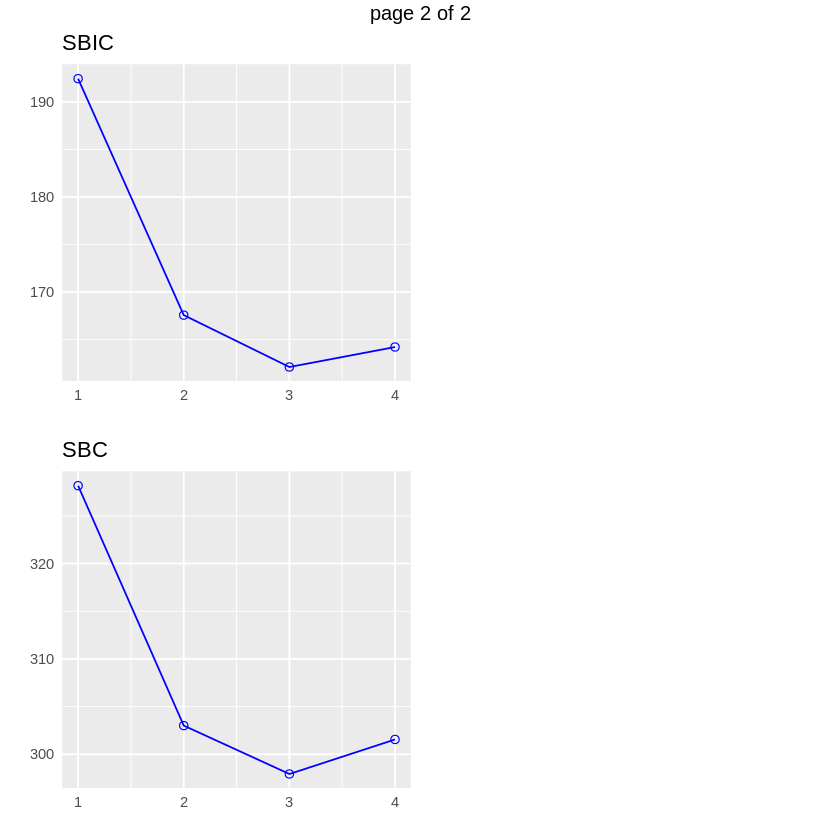

In [ ]:
k<-ols_step_best_subset(model2)
plot(k)

**Step 19** : $E(y)=\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_4 x_4$ is our optimum choice, fit that model (with the transformed responseonly)

In [ ]:
model3=lm(y~x1+x2+x4,data=df1)
summary(model3)


Call:
lm(formula = y ~ x1 + x2 + x4, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8708  -3.6606  -0.3381   2.7630  14.1451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.280234  14.427378   6.951 1.93e-08 ***
x1           -2.768207   0.925443  -2.991  0.00469 ** 
x2           -0.009843   0.001500  -6.560 6.91e-08 ***
x4          110.878269  18.326806   6.050 3.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.62 on 41 degrees of freedom
Multiple R-squared:  0.7075,	Adjusted R-squared:  0.6861 
F-statistic: 33.06 on 3 and 41 DF,  p-value: 5.023e-11


**Step 20** : Since we dropped a column, we do the influenrial diagnostics again

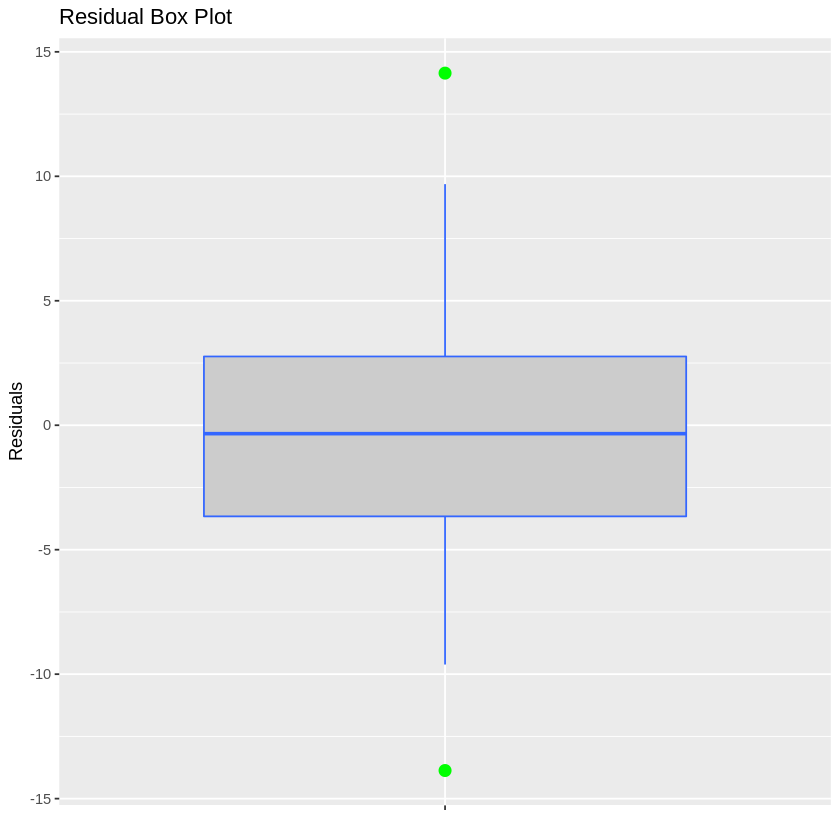

In [ ]:
ols_plot_resid_box(model3)

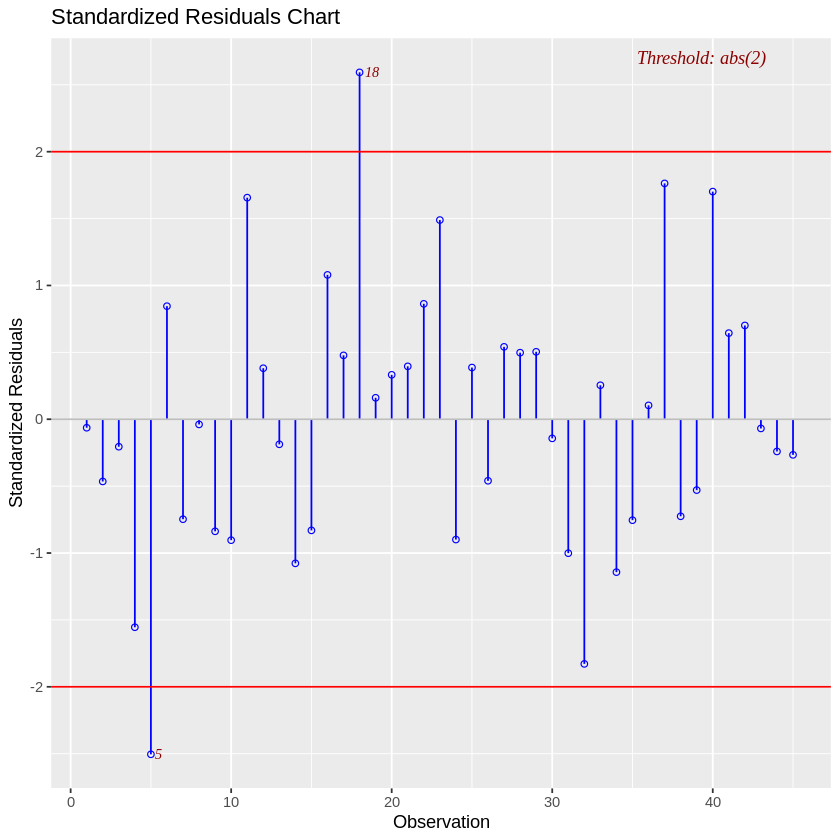

In [ ]:
ols_plot_resid_stand(model3)

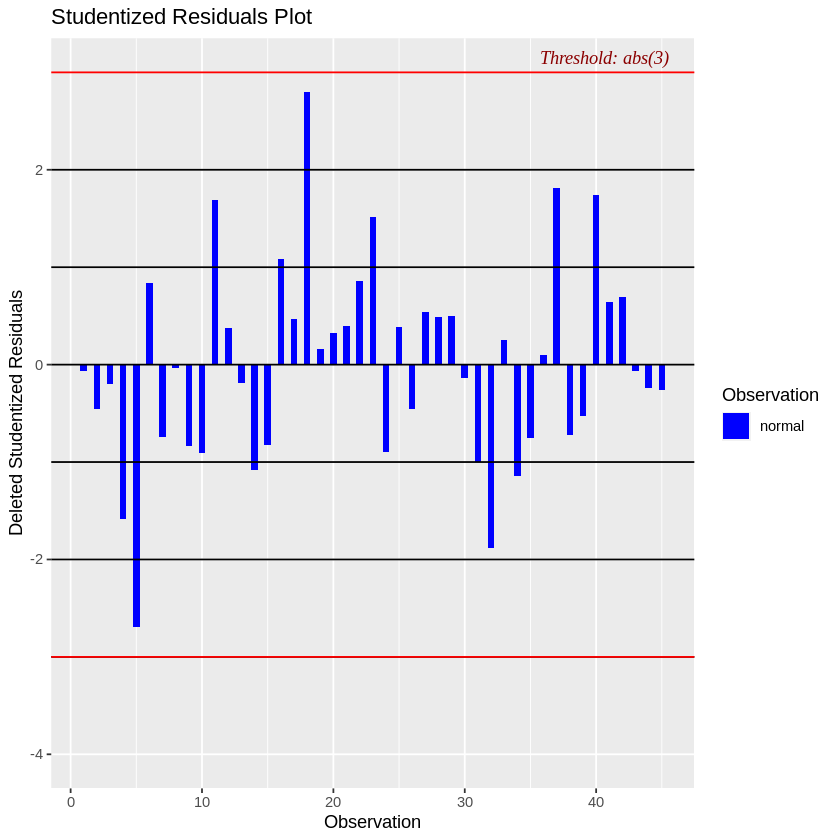

In [ ]:
ols_plot_resid_stud(model3)

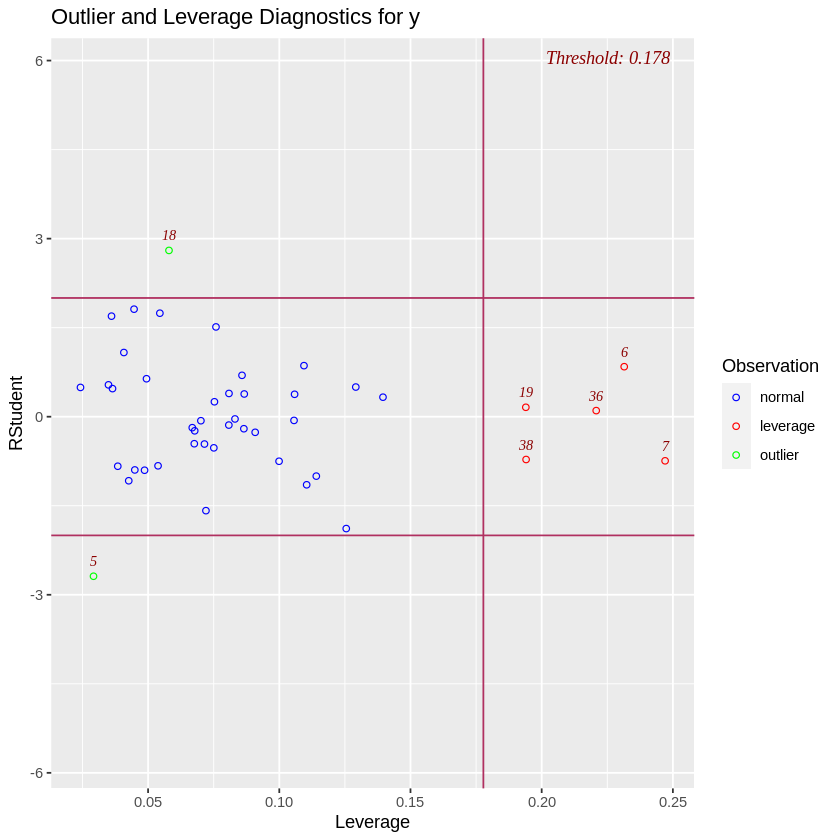

In [ ]:
ols_plot_resid_lev(model3)

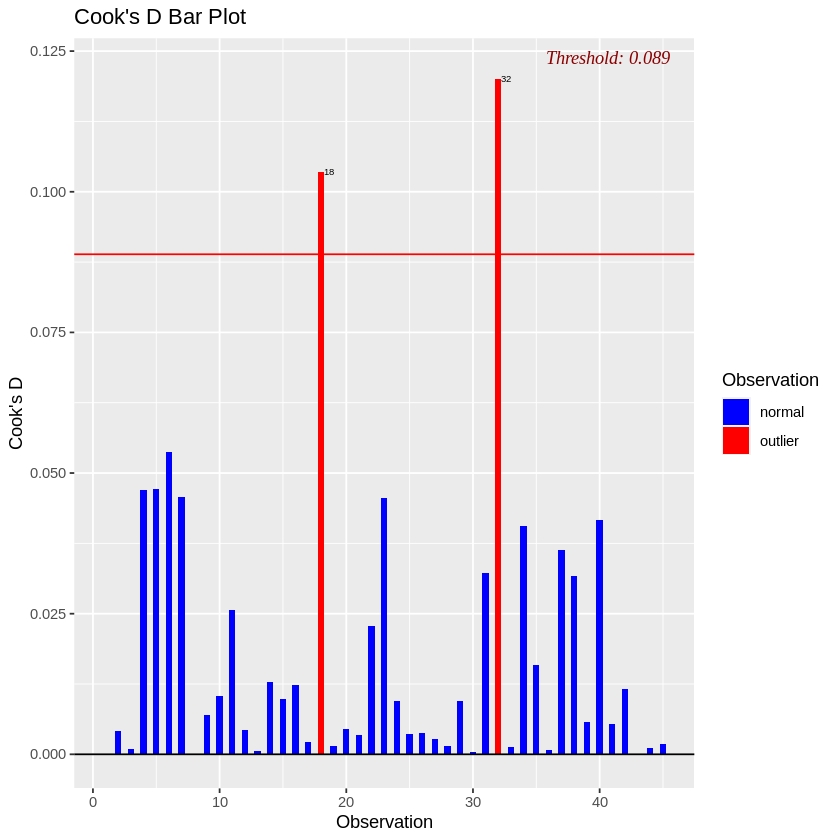

In [ ]:
ols_plot_cooksd_bar(model3)

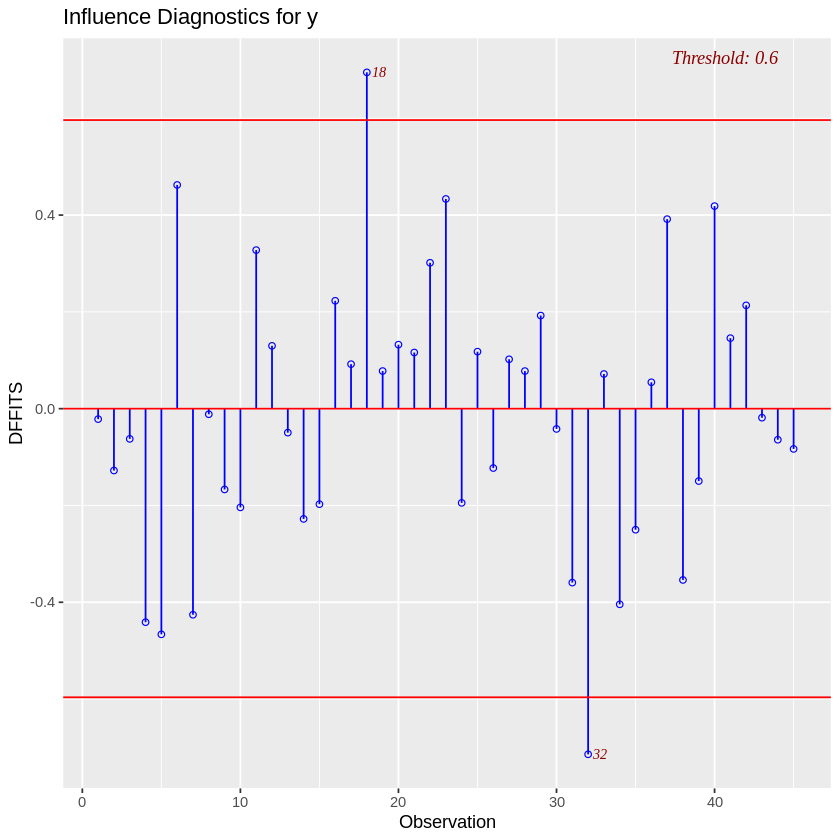

In [ ]:
ols_plot_dffits(model3)

**Step 20** : Drop influential points and check standard assumptions

In [ ]:
df2=df1[-c(18,32),]
model4=lm(y~x1+x2+x4,data=df2)
summary(model4)


Call:
lm(formula = y ~ x1 + x2 + x4, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6874  -3.5633  -0.2955   2.8905   9.8120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  94.819005  13.191670   7.188 1.19e-08 ***
x1           -2.335081   0.839784  -2.781  0.00831 ** 
x2           -0.010258   0.001431  -7.168 1.26e-08 ***
x4          117.570783  16.559112   7.100 1.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.043 on 39 degrees of freedom
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7374 
F-statistic: 40.31 on 3 and 39 DF,  p-value: 4.974e-12


In [ ]:
df2[6]=model4$fitted.values
head(df2)

,x1,x2,x3,x4,y,fits
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,9.0,3571,1976,0.525,98.09161,98.89628
2,9.0,4092,1250,0.572,95.99420,99.07763
3,9.0,3865,1586,0.580,100.53124,102.34679
4,7.5,4870,2351,0.529,81.82171,89.54391
5,8.0,4399,431,0.544,81.28414,94.97150
6,10.0,5342,1333,0.571,87.49564,83.80236


In [ ]:
ols_test_breusch_pagan(model4)
ols_test_breusch_pagan(model4,rhs=T)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

            Data              
 -----------------------------
 Response : y 
 Variables: fitted values of y 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.2218437 
 Prob > Chi2   =    0.6376387 


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

       Data         
 -------------------
 Response : y 
 Variables: x1 x2 x4 

       Test Summary         
 ---------------------------
 DF            =    3 
 Chi2          =    1.310387 
 Prob > Chi2   =    0.726668 

In [ ]:
shapiro.test(model4$residuals)


	Shapiro-Wilk normality test

data:  model4$residuals
W = 0.97517, p-value = 0.4685


In [ ]:
durbinWatsonTest(model4)

 lag Autocorrelation D-W Statistic p-value
   1        0.104582      1.789389   0.382
 Alternative hypothesis: rho != 0

In [ ]:
ols_coll_diag(model4)[1]

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
x1,0.9491353,1.053591
x2,0.9841836,1.016071
x4,0.9585887,1.043200


**Step 21** : Again check actual vs fitted(transformed data)

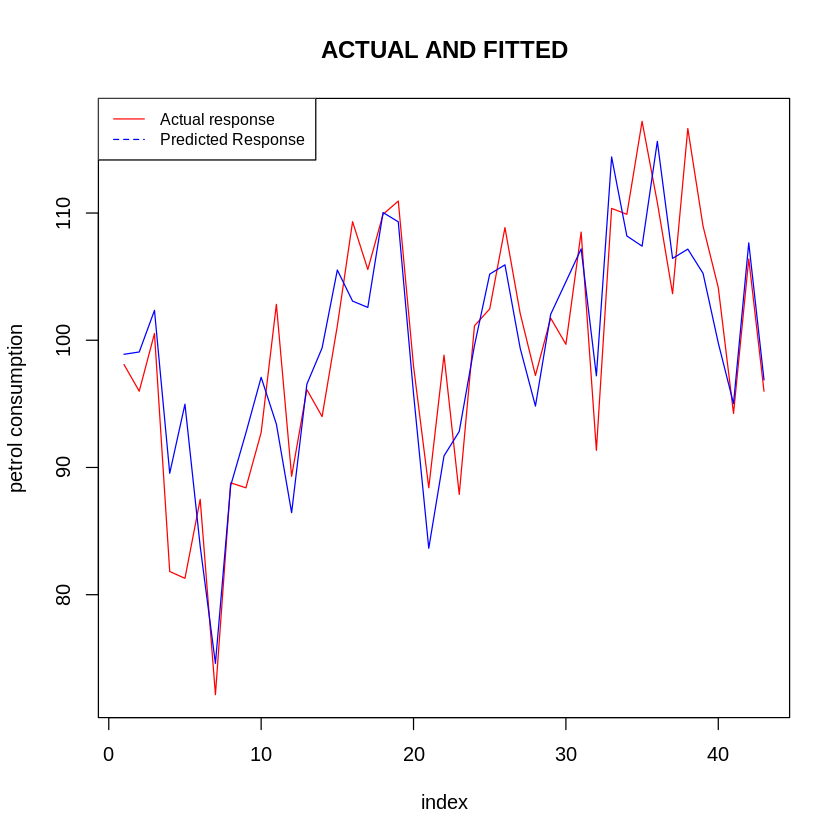

In [ ]:
plot(df2$y,type="l",col="red",xlab="index",ylab="petrol consumption",main="ACTUAL AND FITTED")
lines(df2$fits,type="l",col="blue")
legend("topleft",c("Actual response", "Predicted Response"),
       col=c("red", "blue"),lty=1:2, cex=0.8)

**Step 22** : Check agreement between actual vs fitted (original data)

In [ ]:
orgfits=(lambda*df2$fits+1)^(1/lambda)
df2[7]=orgfits
orgdata=(lambda*df2$y+1)^(1/lambda)
df2[8]=orgdata
colnames(df2)<-c("x1","x2","x3","x4","y","fits","orgfits","orgy")
head(df2)

,x1,x2,x3,x4,y,fits,orgfits,orgy
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.0,3571,1976,0.525,98.09161,98.89628,547.5698,541
2,9.0,4092,1250,0.572,95.99420,99.07763,549.0542,524
3,9.0,3865,1586,0.580,100.53124,102.34679,576.0401,561
4,7.5,4870,2351,0.529,81.82171,89.54391,472.8675,414
5,8.0,4399,431,0.544,81.28414,94.97150,515.7766,410
6,10.0,5342,1333,0.571,87.49564,83.80236,428.8493,457


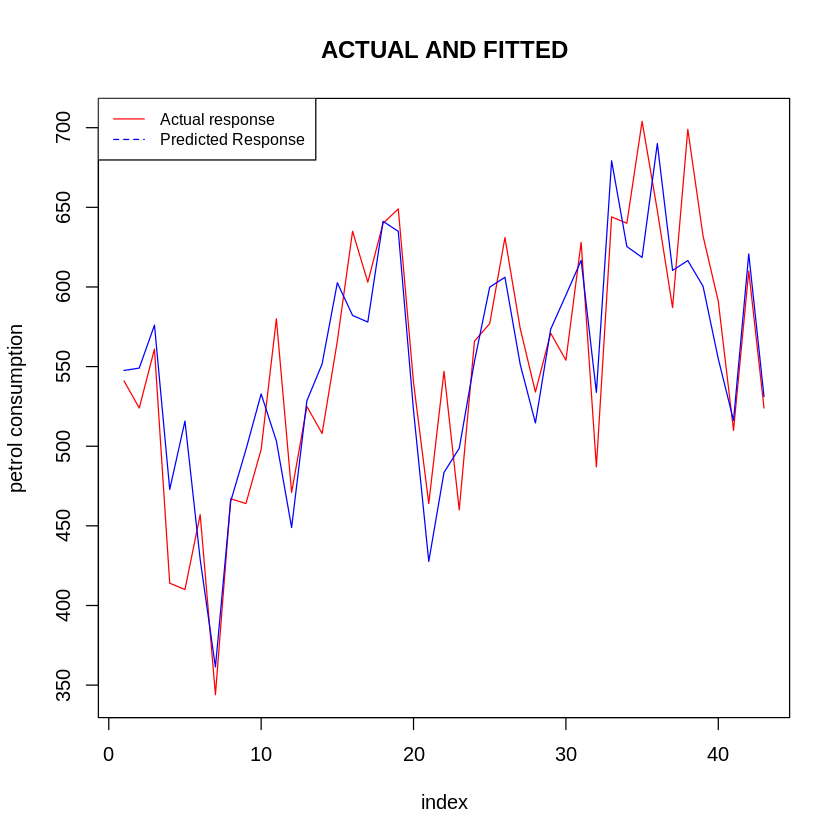

In [ ]:
plot(df2$orgy,type="l",col="red",xlab="index",ylab="petrol consumption",main="ACTUAL AND FITTED")
lines(df2$orgfits,type="l",col="blue")
legend("topleft",c("Actual response", "Predicted Response"),
       col=c("red", "blue"),lty=1:2, cex=0.8)

*Below is the code for a more attractive plot using ggplot2 - only for using in PPT*

Warning message:
“Use of `df2$y` is discouraged. Use `y` instead.”
Warning message:
“Use of `df2$fits` is discouraged. Use `fits` instead.”


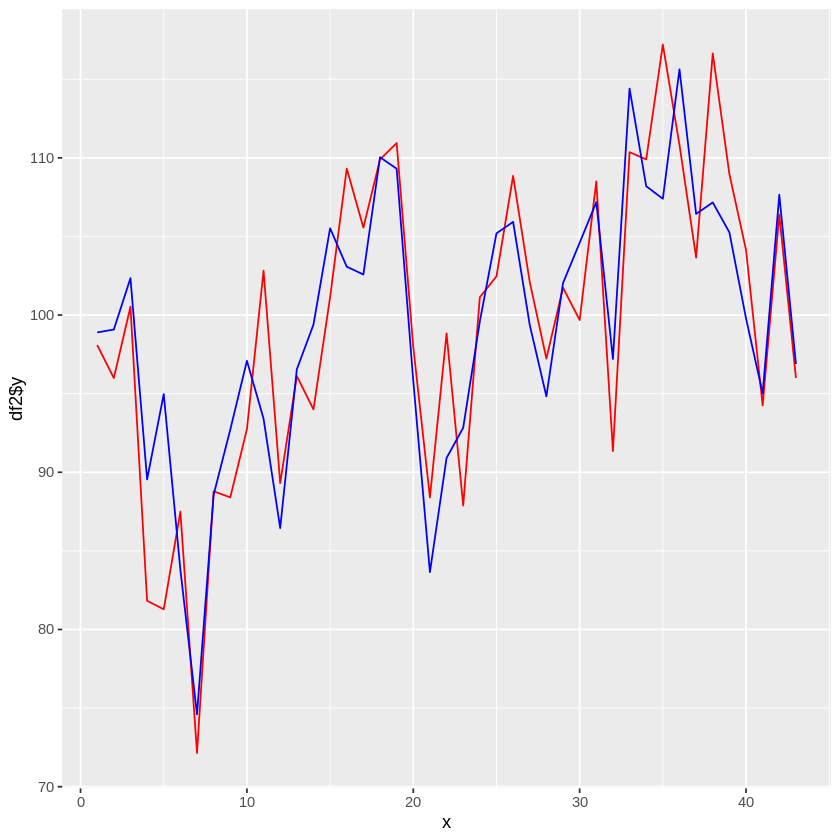

In [ ]:
x=1:43
g <- ggplot(df2, aes(x))
g <- g + geom_line(aes(y=df2$y), colour="red")
g <- g + geom_line(aes(y=df2$fits), colour="blue")
g
